In [3]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [4]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target  # 3 classes


In [4]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:

# Important: Scale features (SVM is sensitive to feature scales)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
# Create and train SVM with RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # gamma='scale' is a good default
svm_model.fit(X_train, y_train)


SVC()

In [7]:
# Predict on test set
y_pred = svm_model.predict(X_test)

In [8]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Visulization 

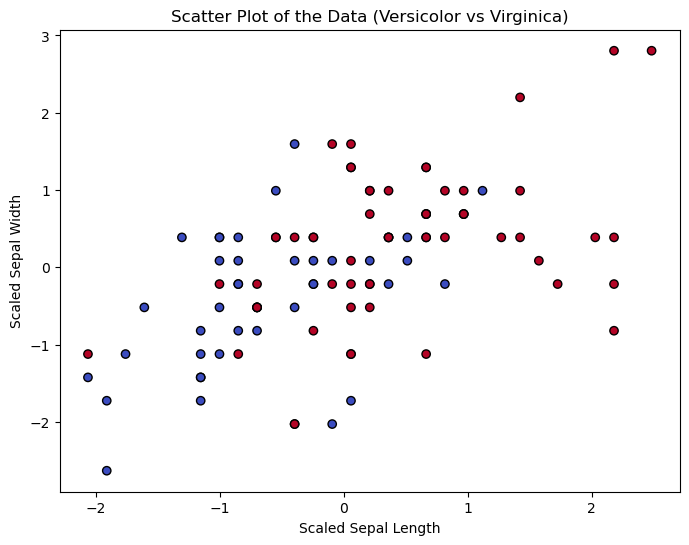

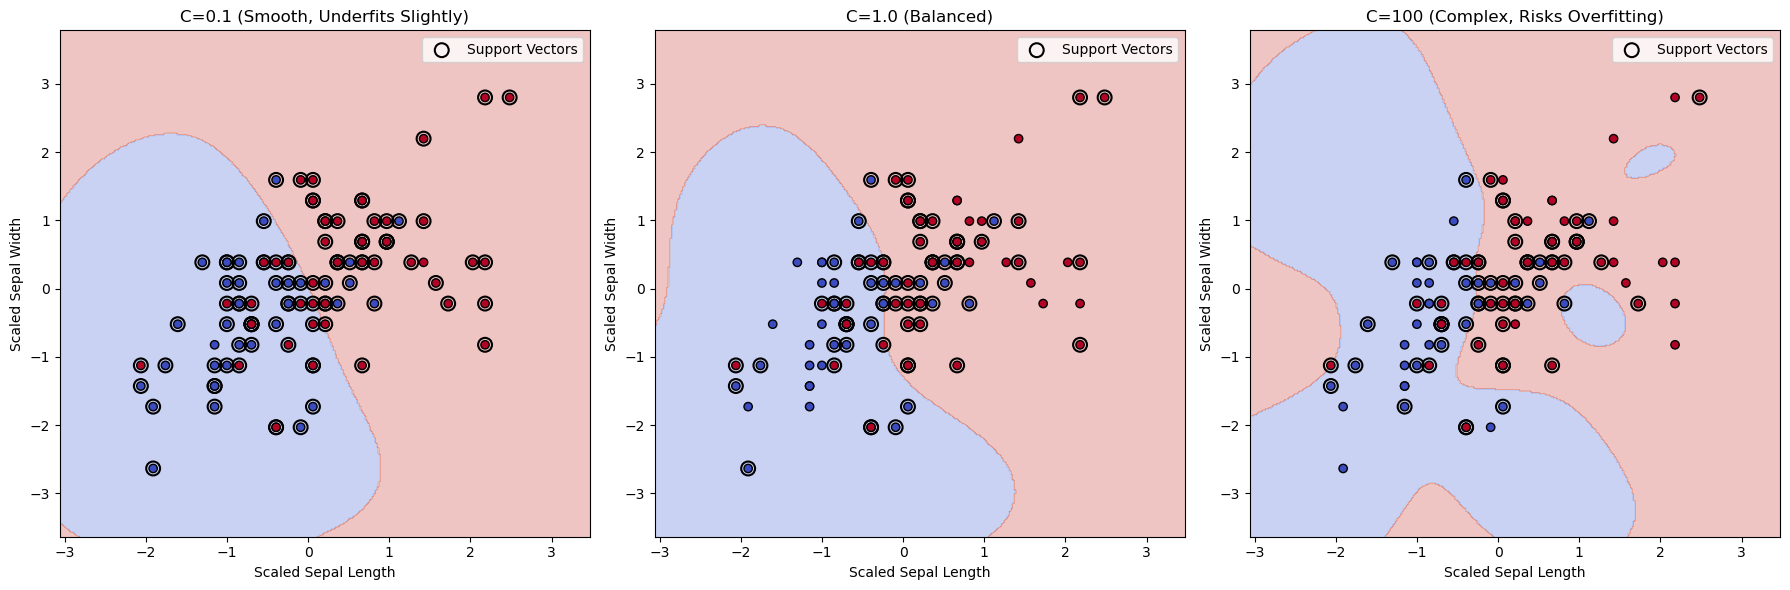

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only first two features for 2D visualization
y = iris.target

# Select only two classes (versicolor and virginica) for binary classification
# These classes overlap a bit, making visualization interesting
mask = y != 0  # Exclude setosa (class 0)
X = X[mask]
y = y[mask]
y = y - 1  # Relabel: versicolor=0, virginica=1

# Scale features - crucial for SVM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to plot scatter + decision boundary
def plot_svm(model, X, y, title, ax=None):
    if ax is None:
        ax = plt.gca()
    
    # Create grid for decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Predict on grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Shade decision regions
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    
    # Plot data points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    
    # Highlight support vectors
    if hasattr(model, 'support_vectors_'):
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=100, facecolors='none', edgecolors='black',
                   linewidth=1.5, label='Support Vectors')
    
    ax.set_title(title)
    ax.set_xlabel("Scaled Sepal Length")
    ax.set_ylabel("Scaled Sepal Width")
    ax.legend()



# visulization of more Valuable value

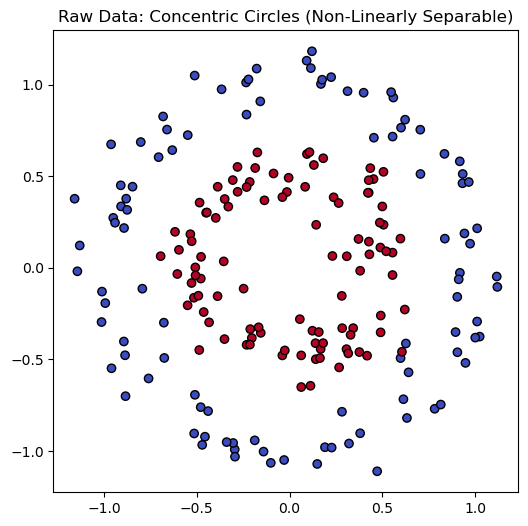

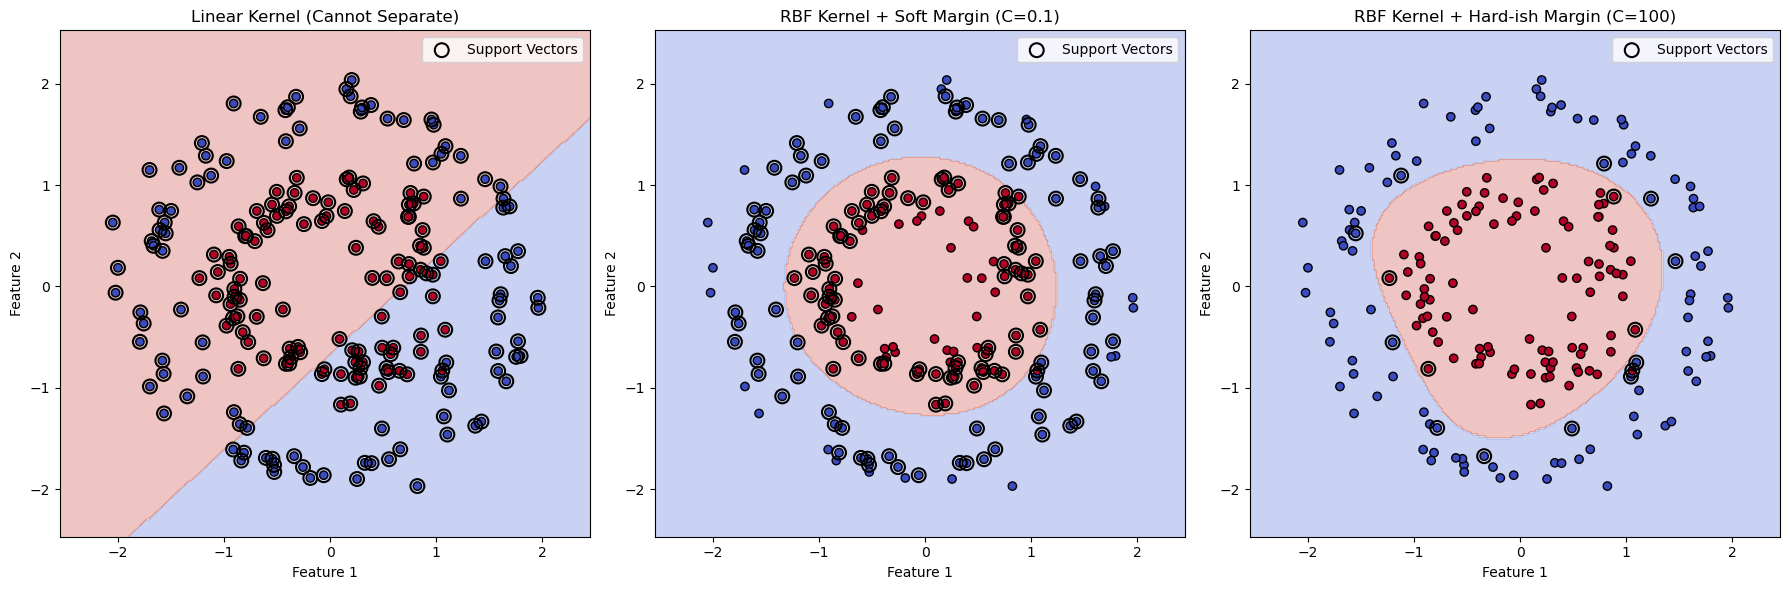

Linear: many support vectors (almost all points)
RBF C=0.1: more support vectors (smoother)
RBF C=100: fewer support vectors (fits tightly)
